In [80]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
data=pd.read_csv('data.csv')
data=data.drop(columns=data.columns[0])
data.head()
print('The number of rows in the dataset is',data.shape[0])
print('The number of columns in the dataset is',data.shape[1])


The number of rows in the dataset is 15
The number of columns in the dataset is 2


#### Plotting the data

/tmp/ipykernel_30603/588286051.py:3: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn')
/tmp/ipykernel_30603/588286051.py:4: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.scatterplot(x=data['LSAT'], y=data['GPA'], palette='coolwarm')


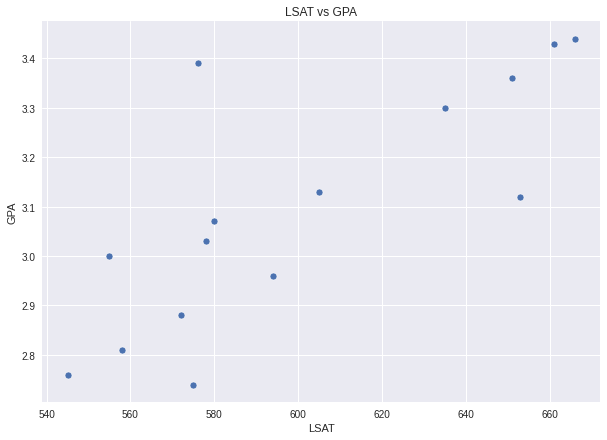

In [81]:
#   plot the data
plt.figure(figsize=(10,7))
plt.style.use('seaborn')
sns.scatterplot(x=data['LSAT'], y=data['GPA'], palette='coolwarm')
plt.title('LSAT vs GPA')
plt.xlabel('LSAT')
plt.ylabel('GPA')
plt.show()

### Correlations

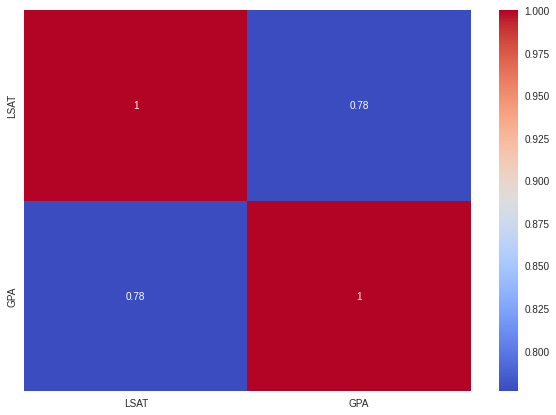

In [82]:
plt.figure(figsize=(10,7))
corr_matrix = data.corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
# change the size of the plot   
plt.show()

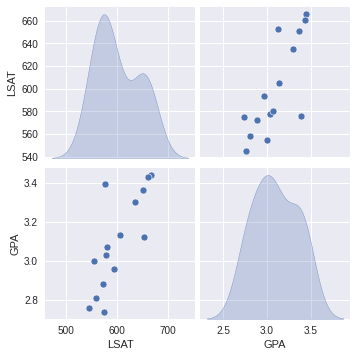

In [83]:
# draw a scatter plot of the data
sns.pairplot(data, diag_kind='kde')

In [84]:
import bootstrapped.bootstrap as bs
import bootstrapped.stats_functions as bs_stats
from itertools import chain, combinations
import random
def calculate_corr_sample(sample):
    last=[ x[0] for x in sample]
    gpa=[ x[1] for x in sample]
    return np.corrcoef(last,gpa)[0,1]

#### for 4000 sample size

In [85]:
samples_count =4000
samples=np.random.choice(len(data),size=(samples_count,len(data)),replace=True)
bootstrap_samples=[]
for i in range(samples_count):
    LSAT=[data.iloc[x]['LSAT'] for x in samples[i]]
    GPA=[data.iloc[x]['GPA'] for x in samples[i]]
    bootstrap_samples.append([[lsat,gpa]for lsat,gpa in zip(LSAT,GPA)])
    

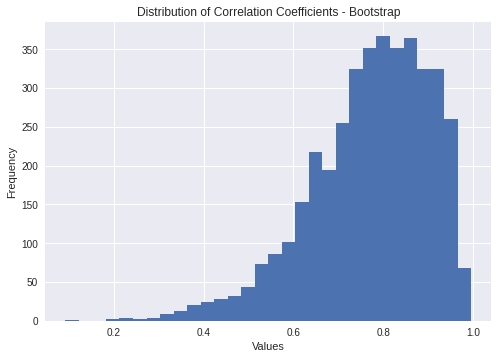

In [91]:
Correlations_bootstrap=[calculate_corr_sample(t) for t in bootstrap_samples]
plt.hist(Correlations_bootstrap, bins=30)
plt.xlabel('Values')
plt.ylabel('Frequency')
plt.title('Distribution of Correlation Coefficients - Bootstrap')
plt.show()

#### In complete enumeration , We expect to have 2**(size of the data) possible enumerations

In [87]:
print('Expected combinations:',(2**len(data)))

def powerset(iterable):
    "powerset([1,2,3]) --> () (1,) (2,) (3,) (1,2) (1,3) (2,3) (1,2,3)"
    s = list(iterable) 
    return chain.from_iterable(combinations(s, r) for r in range(len(s)+1))
# all possible combinations of the data indices
allCombination=[]
for i, combo in enumerate(powerset(data.index), 1):
    allCombination.append(combo)
print('Implemented Length of all combinations:',len(allCombination))

# show 5 items of all combinations randomly
for i in random.sample(allCombination,5):
    print('a sample from all possible enumerations:',i)


Expected combinations: 32768
Implemented Length of all combinations: 32768
a sample from all possible enumerations: (0, 2, 5, 7, 10, 12, 13, 14)
a sample from all possible enumerations: (0, 5, 10)
a sample from all possible enumerations: (1, 2, 3, 7, 8, 11, 13, 14)
a sample from all possible enumerations: (0, 2, 4, 5, 6, 8, 12, 13)
a sample from all possible enumerations: (0, 2, 3, 5, 6, 8, 9, 11, 12, 14)


#### recomputing the pearson corr coefficient with all the possible enumerations

In [88]:
Correlations_full_enum=[]
for k in allCombination[1000:1020]:
    NewSample=data.iloc[[x for x in k]]
    Correlations_full_enum.append(np.corrcoef(NewSample['LSAT'],NewSample['GPA'])[0,1])

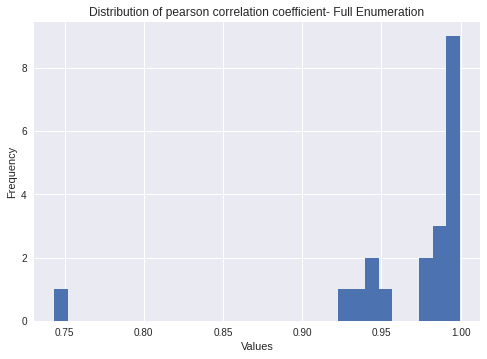

In [93]:
plt.hist(Correlations_full_enum, bins=30)
plt.xlabel('Values')
plt.ylabel('Frequency')
plt.title('Distribution of pearson correlation coefficient- Full Enumeration')
plt.show()

#### Comparing resulted Distributions

Text(0.5, 1.0, 'Distribution of pearson correlation coefficient- Full Enumeration')

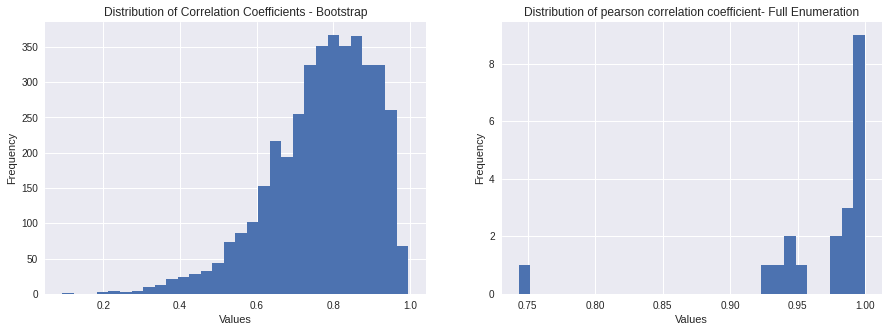

In [92]:
# plot the distribution of correlation coefficients side by side
fig, ax = plt.subplots(1, 2, figsize=(15, 5))
ax[0].hist(Correlations_bootstrap, bins=30)
ax[0].set_xlabel('Values')
ax[0].set_ylabel('Frequency')
ax[0].set_title('Distribution of Correlation Coefficients - Bootstrap')
ax[1].hist(Correlations_full_enum, bins=30)
ax[1].set_xlabel('Values')
ax[1].set_ylabel('Frequency')
ax[1].set_title('Distribution of pearson correlation coefficient- Full Enumeration')


In [99]:
# calculate the mean and standard deviation of the correlation coefficients
print('The mean of the correlation coefficients of the bootstrap is',np.mean(Correlations_bootstrap))
print('The standard deviation of the correlation coefficients of the bootstrap is',np.std(Correlations_bootstrap))
print('The mean of the correlation coefficients of the full enumeration is',np.mean(Correlations_full_enum))
print('The standard deviation of the correlation coefficients of the full enumeration is',np.std(Correlations_full_enum))

print('without any enumeration or bootstrap, the value for the correlation coefficient is',np.corrcoef(data['LSAT'],data['GPA'])[0,1])

The mean of the correlation coefficients of the bootstrap is 0.7708215062744419
The standard deviation of the correlation coefficients of the bootstrap is 0.13375724066035638
The mean of the correlation coefficients of the full enumeration is 0.9666875143910401
The standard deviation of the correlation coefficients of the full enumeration is 0.05603307123577183
without any enumeration or bootstrap, the value for the correlation coefficient is 0.776374491289407
